In [1]:
# Importar las librerías necesarias
import pandas as pd

In [2]:
# Cargar el csv
car_data = pd.read_csv('car data.csv')

In [3]:
# Mostrar las primeras filas 
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Revisar si hay valores nulos en las columnas
car_data.isnull().sum()

# Ver las estadísticas básicas de las variables numéricas
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


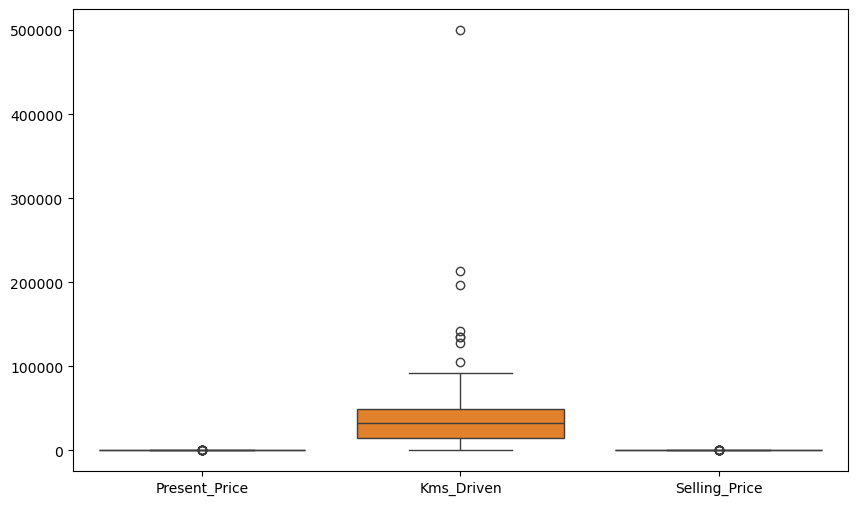

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para identificar valores atípicos en las variables numéricas
plt.figure(figsize=(10,6))
sns.boxplot(data=car_data[['Present_Price', 'Kms_Driven', 'Selling_Price']])
plt.show()

In [14]:
# Eliminar la columna 'Car_Name'
car_data = car_data.drop(['Car_Name'], axis=1)

In [16]:
# Convertir las variables categóricas a numéricas
car_data = pd.get_dummies(car_data, drop_first=True)

# Verificar los datos después del One Hot Encoding
car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,True,False,True
1,2013,4.75,9.54,43000,0,True,False,False,True
2,2017,7.25,9.85,6900,0,False,True,False,True
3,2011,2.85,4.15,5200,0,False,True,False,True
4,2014,4.60,6.87,42450,0,True,False,False,True


In [18]:
from sklearn.feature_selection import SelectKBest, f_regression

# Dividir X e y
X = car_data.drop('Selling_Price', axis=1)
y = car_data['Selling_Price']

# Seleccionar las mejores características
selector = SelectKBest(score_func=f_regression, k=5)  # Seleccionamos las 5 mejores características
X_selected = selector.fit_transform(X, y)

# Mostrar las características seleccionadas
print(X.columns[selector.get_support()])

Index(['Present_Price', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')


In [20]:
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Predecir valores con el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2}")
print(f"MSE: {mse}")

R²: 0.7280685773960385
MSE: 6.26409926911632


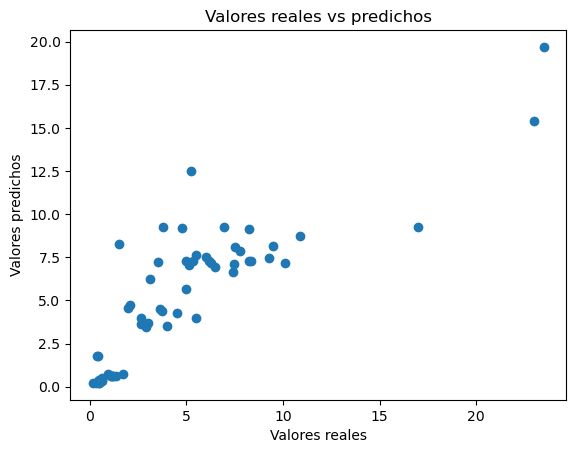

In [26]:
# Gráfico de dispersión de los valores reales vs predichos
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs predichos')
plt.show()